# Heart Disease prediction
- [Data](./data/heart.csv) is from [Kaggle](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)
- Original dataset is from [UCI Machine Learning Repository](https://archive-beta.ics.uci.edu/ml/datasets/heart+disease)

<details>
<summary><b>Additional Information</b></summary>
<p><a href="./data/heart.csv">heart.csv</a> is training data with id as index.</p>
<p>This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.  In particular, the Cleveland database is the only one that has been used by ML researchers to
 this date.  The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).</p>
</details>

<details>
<summary><b>Columns Description</b></summary>
<p>

1. **age**: Age in years
2. **Sex**: sex (1 = male; 0 = female)
3. **cp**:  chest pain type
- 1: typical angina
- 2: atypical angina
- 3: non-anginal pain
- 4: asymptomatic
4. **trestbps**: resting blood pressure (in mm Hg on admission to the hospital)
5. **chol**: serum cholestoral in mg/dl
6. **fbs**:  (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
7. **restecg**: resting electrocardiographic results
- 0: normal
- 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. **thalach**: maximum heart rate achieved
9.  **exang**:  exercise induced angina (1 = yes; 0 = no)
10. **oldpeak**: ST depression induced by exercise relative to rest
11. **slope**: the slope of the peak exercise ST segment
- 1: upsloping
- 2: flat
- 3: downsloping
12. **ca**: number of major vessels (0-3) colored by flourosopy
13. **thal**: 3 = normal; 6 = fixed defect; 7 = reversable defect

***Target Variable***
14. **num**: diagnosis of heart disease (angiographic disease status)
- 0: < 50% diameter narrowing
- 1: > 50% diameter narrowing
</p>
</details>

## Idea
Using **Neural networks** to make ML model
- `3` hidden layers
- - 1st layer - `18` neurons (`relu`)
- - 2nd layer - `36` neurons (`relu`)
- - 3rd layer - `9` neurons  (`relu`)
- 4th layer - output layer (`sigmoid`)
-  *logistic regression* to predict heart disease.

## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-darkgrid")

In [2]:
data = pd.read_csv("./data/train.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,42,1,3,148,244,0,0,178,0,0.8,2,2,2,1
1,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
2,53,1,2,130,246,1,0,173,0,0.0,2,3,2,1
3,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
4,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0


In [3]:
useful_features = ["age", "sex", "cp", "trestbps", "chol", "fbs", "thalach", "exang"]
data = data[useful_features + ["target"]]
data.head()

,age,sex,cp,trestbps,chol,fbs,thalach,exang,target
0,42,1,3,148,244,0,178,0,1
1,66,0,2,146,278,0,152,0,1
2,53,1,2,130,246,1,173,0,1
3,58,0,0,100,248,0,122,0,1
4,53,1,0,123,282,0,95,1,0


## EDA

### Analyzing the data

In [4]:
# pairplot = sns.pairplot(data, hue="target")
# plt.savefig("./EDA/pairplot.png", format="png")

In [5]:
median = data.median()
median.name = "median"
median = pd.DataFrame(median).T

In [6]:
variance = data.var()
variance.name = "variance"
variance = pd.DataFrame(variance).T

In [7]:
data_description = pd.concat([data.describe(), median, variance]).sort_index()
data_description

,age,sex,cp,trestbps,chol,fbs,thalach,exang,target
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,132.000000,0.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,243.000000,0.000000,152.000000,0.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,276.000000,0.000000,165.000000,1.000000,1.000000
count,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,202.000000,1.000000,1.000000
mean,54.640244,0.703659,0.952439,131.542683,247.051220,0.151220,149.053659,0.341463,0.510976
median,56.000000,1.000000,1.000000,130.000000,243.000000,0.000000,152.000000,0.000000,1.000000
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000
std,9.001890,0.456922,1.036068,17.372649,52.031946,0.358481,23.020605,0.474490,0.500185
variance,81.034032,0.208778,1.073437,301.808921,2707.323381,0.128509,529.948277,0.225141,0.250185


In [8]:
target_grp = data.groupby("target")

In [9]:
pd.set_option("display.max_columns", 80)
data_desc = target_grp.describe().T.sort_index().T
data_desc

age                                                       chol  \
         25%   50%   75%  count   max       mean   min       std    25%   
target                                                                    
0       52.0  58.0  62.0  401.0  77.0  56.548628  35.0  7.956020  218.0   
1       45.0  53.0  59.0  419.0  76.0  52.813842  29.0  9.558368  208.0   

                                                                   cp       \
          50%    75%  count    max        mean    min        std  25%  50%   
target                                                                       
0       253.0  284.0  401.0  409.0  252.172070  131.0  49.374364  0.0  0.0   
1       234.0  266.5  419.0  564.0  242.150358  126.0  54.059765  1.0  2.0   

                                                 exang                        \
        75%  count  max      mean  min       std   25%  50%  75%  count  max   
target                                                                         
0       1.0  401.0  3.0  0.498753  0.0  0.922292   0.0  1.0  1.0  401.0  1.0   
1       2.0  419.0  3.0  1.386635  0.0  0.950151   0.0  0.0  0.0  419.0  1.0   

                                 fbs                                       \
            mean  min       std  25%  50%  75%  count  max      mean  min   
target                                                                      
0       0.551122  0.0  0.498001  0.0  0.0  0.0  401.0  1.0  0.164589  0.0   
1       0.140811  0.0  0.348243  0.0  0.0  0.0  419.0  1.0  0.138425  0.0   

                  sex                                                thalach  \
             std  25%  50%  75%  count  max      mean  min       std     25%   
target                                                                         
0       0.371272  1.0  1.0  1.0  401.0  1.0  0.837905  0.0  0.368998   125.0   
1       0.345758  0.0  1.0  1.0  419.0  1.0  0.575179  0.0  0.494907   148.0   

                                                                trestbps  \
          50%    75%  count    max        mean   min        std      25%   
target                                                                     
0       142.0  158.0  401.0  195.0  139.526185  71.0  22.769166    120.0   
1       161.0  172.0  419.0  202.0  158.171838  96.0  19.282440    120.0   

                                                                  
          50%    75%  count    max        mean    min        std  
target                                                            
0       130.0  142.0  401.0  200.0  133.658354  100.0  18.350490  
1       130.0  140.0  419.0  180.0  129.517900   94.0  16.146208

<AxesSubplot:xlabel='exang', ylabel='age'>

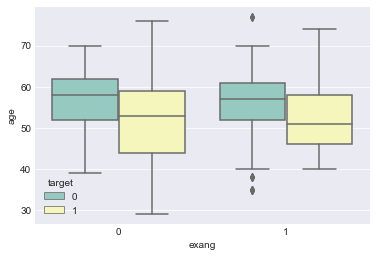

In [50]:
sns.boxplot(x="exang", y="age", hue="target", data=data)

<AxesSubplot:xlabel='exang', ylabel='age'>

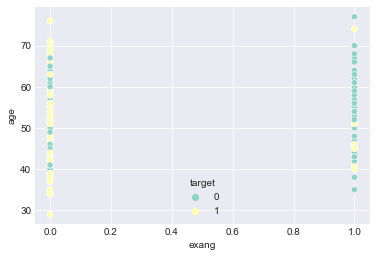

In [51]:
sns.scatterplot(x="exang", y="age", hue="target", data=data)

<AxesSubplot:xlabel='cp', ylabel='age'>

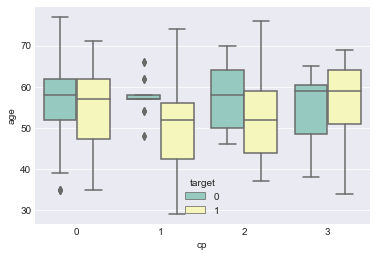

In [10]:
sns.boxplot(x="cp", y="age", hue="target", data=data)

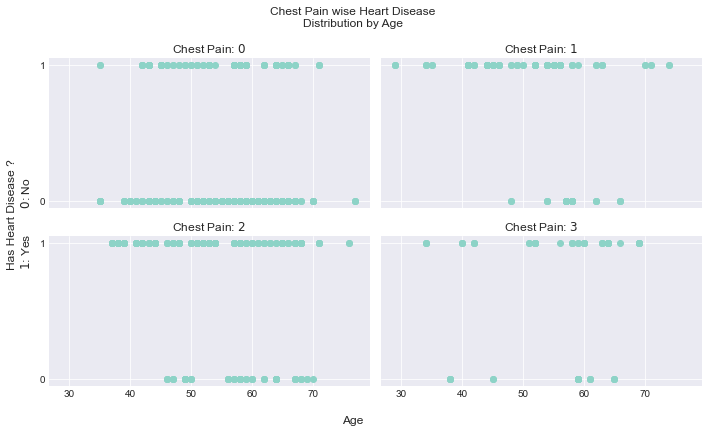

In [47]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6), sharey=True, sharex=True)
fig.suptitle("Chest Pain wise Heart Disease\nDistribution by Age")
fig.supxlabel("Age")
fig.supylabel("Has Heart Disease ?\n$1$: Yes\t$0$: No")
n = 0
for i in range(2):
    for j in range(2):
        cp = data[data["cp"]==n]
        x = cp["age"]
        y = cp["target"]
        axes[i][j].set_title(f"Chest Pain: ${n}$")
        axes[i][j].set_yticks([1, 0], [1, 0])
        axes[i][j].scatter(x=x, y=y)
        n += 1
plt.tight_layout()

### Handling Outliers